<a href="https://colab.research.google.com/github/ShihabXSarar/Movie-Recommendation-System-using-Collaborative-filtering/blob/main/Movie_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data1 = pd.read_csv("/content/movie_metadata.csv")

In [ ]:
data1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
data1.shape

(5043, 28)

In [ ]:
data1.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

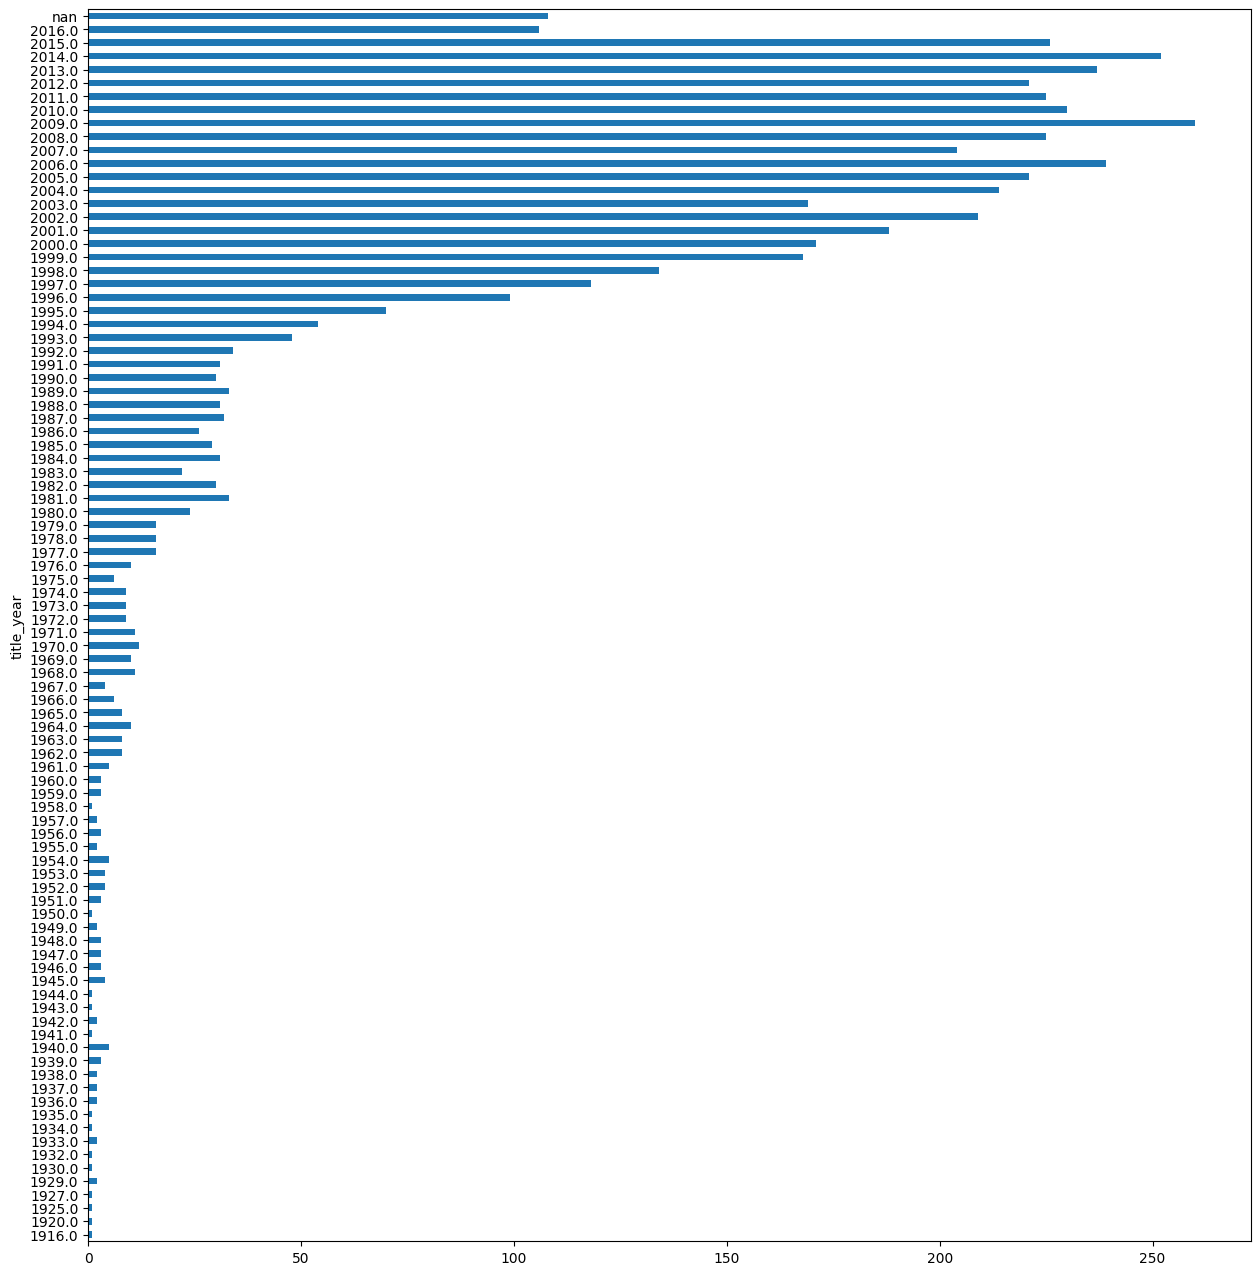

In [ ]:
import matplotlib.pyplot as plt
data1.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

# **So we have Movie data upto 2016**

In [ ]:
data1 = data1.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
# we just need this files so we just save in data1 these 6 files.

In [ ]:
data1.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [ ]:
data1.isna().sum()

,0
director_name,104
actor_1_name,7
actor_2_name,13
actor_3_name,23
genres,0
movie_title,0


In [ ]:
data1['actor_1_name'] = data1['actor_1_name'].replace(np.nan, 'unknown')
data1['actor_2_name'] = data1['actor_2_name'].replace(np.nan, 'unknown')
data1['actor_3_name'] = data1['actor_3_name'].replace(np.nan, 'unknown')
data1['director_name'] = data1['director_name'].replace(np.nan, 'unknown')

In [ ]:
data1.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0


In [ ]:
data1['genres'] = data1['genres'].str.replace('|', ' ')

In [ ]:
data1['movie_title'] = data1['movie_title'].str.lower()

In [ ]:
data1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
# null terminating char at the end
data1['movie_title'][21]

'the amazing spider-man\xa0'

In [ ]:
# removing the null terminating char at the end
data1['movie_title'] = data1['movie_title'].apply(lambda x : x[:-1])

In [ ]:
data1

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
data1['movie_title'][21]

'the amazing spider-man'

In [ ]:
#good to go

In [ ]:
data1.to_csv('data1.csv',index=False)

Lets Worked On Credit and second meta_data

In [ ]:
credits = pd.read_csv('/content/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
data2 = pd.read_csv("/content/movies_metadata2.csv")

<ipython-input-24-c9126a9c1de9>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv("/content/movies_metadata2.csv")


In [ ]:
data2

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
data2['release_date'] = pd.to_datetime(data2['release_date'], errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN, if ‘raise’, then invalid parsing will raise an exception, If ‘ignore’, then invalid parsing will return the input

In [ ]:
#formating the date
data2['year'] = data2['release_date'].dt.year

In [ ]:
data2['year'].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


In [ ]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data 1 processed file.
# We don't have enough data for the movies from 2018, 2019 and 2020.
# We'll deal with it in the upcoming preprocessing files
new_data2 = data2.loc[data2.year == 2017,['genres','id','title','year']]

In [ ]:
new_data2


,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [ ]:
new_data2.dtypes

,0
genres,object
id,object
title,object
year,float64


In [ ]:
#make id to int
new_data2['id'] = new_data2['id'].astype(int)

In [ ]:
#add the new_meta data to the credit data. They all have "id" so we can merge on that.
data = pd.merge(new_data2, credits, on='id')

In [ ]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [ ]:
# we will convert the "genre", "cast" and "crew" column into a list. if we observe it carefully, we will realised that it's a list containing dictionary.
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))  #the "literal_eval" helps to convert the string into a list
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

# **For Genres**

In [ ]:
#Now we will have to take out the individual genres like adventure, action, sci-fi, etc. using the following function


def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction': #am only renaming the "Science Fiction" to "Sci-Fi" to make it the name shorter. Apart from that all other names remain the same.
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen)) #then we will join them together and return the valuse

In [ ]:
#now let's apply the function on the genre column

data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [ ]:
data['genres_list']

,genres_list
0,Adventure Action Fantasy Comedy
1,Action Adventure Fantasy Sci-Fi
2,Action Adventure Fantasy Sci-Fi
3,Action Adventure Comedy Sci-Fi
4,Fantasy Action Adventure
...,...
526,Romance Comedy
527,Crime Comedy Action Family
528,Family Animation Romance Comedy
529,Crime Drama Thriller


## **For Actor 1**

In [ ]:

#let's do the same for cast

def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [ ]:

#let's apply it on the cast column for the first actor

data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

# **For actor 2**

In [ ]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [ ]:
#let's apply it on the cast column for the second actor
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [ ]:
data['actor_2_name']

,actor_2_name
0,Javier Bardem
1,Henry Cavill
2,Tom Hiddleston
3,Zoe Saldana
4,William Hurt
...,...
526,Rosa Honkonen
527,Wallace Shawn
528,NaN
529,Sajal Ali


# **For Actor 3**

In [ ]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [ ]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [ ]:
data['actor_3_name']

,actor_3_name
0,Geoffrey Rush
1,Gal Gadot
2,Cate Blanchett
3,Dave Bautista
4,Benjamin Walker
...,...
526,Tiitus Rantala
527,Gina Holden
528,NaN
529,Akshaye Khanna


# **For Director**

In [ ]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [ ]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [ ]:
data['director_name']

,director_name
0,Joachim Rønning Espen Sandberg
1,Zack Snyder
2,Taika Waititi
3,James Gunn
4,Sean McNamara
...,...
526,Hannaleena Hauru
527,Jonathan A. Rosenbaum
528,Beth David Esteban Bravo
529,Ravi Udyawar


In [ ]:
#selecting only the prepared data
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [ ]:
movie.isna().sum()

,0
director_name,4
actor_1_name,22
actor_2_name,55
actor_3_name,70
genres_list,7
title,0


In [ ]:
#drop missing values
movie = movie.dropna(how='any')

In [ ]:
movie.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres_list,0
title,0


In [ ]:
#renaming
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [ ]:
#convert all movie titles to lower case
movie['movie_title'] = movie['movie_title'].str.lower()

In [ ]:
#we will be using this information later on in the tfidvectorizor
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
old = pd.read_csv('data1.csv')
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [ ]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [ ]:
new = pd.concat([old, movie], ignore_index=True)

In [ ]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
#saving all the data up to 2017
new.to_csv('new_data.csv',index=False)

# **Extracting features of 2018 movies from Wikipedia**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
...,...,...,...,...,...,...
244,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[238]
245,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142]
246,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117]
247,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207]


In [ ]:
#genre need
!pip install tmdbv3api

In [ ]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '514500528da8f14e56884da74c72918c'

In [ ]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    try:
        # Search for the movie
        result = tmdb_movie.search(x)
        if not result:
            return np.NaN  # Return NaN if no results are found

        # Get the movie ID from the first result
        movie_id = result[0].id

        # Fetch movie details from TMDb API
        response = requests.get(f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}')
        response.raise_for_status()  # Raise an error for bad responses (4xx or 5xx)
        data_json = response.json()

        # Extract genres
        if 'genres' in data_json and data_json['genres']:
            genres = [genre['name'] for genre in data_json['genres']]
            return ", ".join(genres)  # Join genres with a comma
        else:
            return np.NaN  # Return NaN if no genres are found

    except Exception as e:
        print(f"Error processing title: {x}, Error: {e}")
        return np.NaN  # Return NaN if an error occurs


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],"Horror, Thriller"
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3],"Thriller, Drama"
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4],"Action, Thriller, Mystery"
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5],"Thriller, Action, Crime"
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6],"Action, Crime, Thriller"
...,...,...,...,...,...,...,...
244,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[238],"Romance, Comedy"
245,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosiac Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142],"Comedy, Mystery, Crime"
246,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117],"Comedy, Drama"
247,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207],"Drama, History"


In [ ]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...","Horror, Thriller"
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,"Thriller, Drama"
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...","Action, Thriller, Mystery"
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...","Thriller, Action, Crime"
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,"Action, Crime, Thriller"
...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...","Romance, Comedy"
245,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...","Comedy, Mystery, Crime"
246,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...","Comedy, Drama"
247,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...","Drama, History"


**extract the director**

In [ ]:
def get_director(x):
    if " (director)" in x: #we are getting "director"
        return x.split(" (director)")[0]
    elif " (directors)" in x: #we are getting "directors" with "s"
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0] #we are getting "directors/screenplay"

In [ ]:
#let's apply the above function on the "Cast and crew" column
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

<ipython-input-71-e4fd6ee00db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [ ]:
df_2018

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...","Horror, Thriller",Adam Robitel
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,"Thriller, Drama",Christopher Radcliff (director/screenplay); Lauren Wolkstein
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...","Action, Thriller, Mystery",Jaume Collet-Serra
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...","Thriller, Action, Crime",Babak Najafi
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,"Action, Crime, Thriller",Brett Donowho
...,...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...","Romance, Comedy",Peter Segal
245,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...","Comedy, Mystery, Crime",Etan Cohen
246,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...","Comedy, Drama",Adam McKay
247,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...","Drama, History",Mimi Leder


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

<ipython-input-74-94b1a1569c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


**Actor 2**

In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

<ipython-input-76-75f2be6b779a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


**Actro 3**

In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...","Horror, Thriller",Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,"Thriller, Drama",Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...","Action, Thriller, Mystery",Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...","Thriller, Action, Crime",Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,"Action, Crime, Thriller",Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
244,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...","Romance, Comedy",Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
245,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...","Comedy, Mystery, Crime",Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
246,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...","Comedy, Drama",Adam McKay,Christian Bale,Amy Adams,Steve Carell
247,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...","Drama, History",Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [ ]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [ ]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,"Horror, Thriller",Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,"Thriller, Drama",The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,"Action, Thriller, Mystery",The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,"Thriller, Action, Crime",Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,"Action, Crime, Thriller",Acts of Violence
...,...,...,...,...,...,...
244,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,"Romance, Comedy",Second Act
245,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,"Comedy, Mystery, Crime",Holmes & Watson
246,Adam McKay,Christian Bale,Amy Adams,Steve Carell,"Comedy, Drama",Vice
247,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,"Drama, History",On the Basis of Sex


In [ ]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [ ]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,"Horror, Thriller",insidious: the last key,"Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror, Thriller"
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,"Thriller, Drama",the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,"Action, Thriller, Mystery",the commuter,"Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action, Thri..."
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,"Thriller, Action, Crime",proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,"Action, Crime, Thriller",acts of violence,"Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action, Crime, Thr..."
...,...,...,...,...,...,...,...
244,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,"Romance, Comedy",second act,"Jennifer Lopez Leah Remini Vanessa Hudgens Peter Segal Romance, Comedy"
245,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,"Comedy, Mystery, Crime",holmes & watson,"Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Comedy, Mystery, Crime"
246,Adam McKay,Christian Bale,Amy Adams,Steve Carell,"Comedy, Drama",vice,"Christian Bale Amy Adams Steve Carell Adam McKay Comedy, Drama"
247,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,"Drama, History",on the basis of sex,"Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama, History"


**Extract 2019 movies data**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
245,D E C E M B E R,25,Spies in Disguise,20th Century Fox Animation / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[133]
246,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[226]
247,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[227]
248,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[228]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...","Horror, Thriller, Mystery"
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...","Thriller, Drama, Action, Crime"
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,"Drama, Adventure, Family"
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...","Comedy, Drama"
...,...,...,...
245,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...","Animation, Action, Adventure, Comedy, Family"
246,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...","Drama, Romance, History"
247,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,"War, History, Thriller, Drama"
248,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...","Drama, Crime, History"


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-118-a433a4faa834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-120-eee71c5586b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-122-48d0aadc78c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})


In [ ]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()


In [ ]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']


In [ ]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,"Horror, Thriller, Mystery",escape room,"Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror, Thril..."
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,"Thriller, Drama, Action, Crime",rust creek,"Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller, Drama,..."
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,"Drama, Adventure, Family",a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,"Comedy, Drama",the upside,"Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy, Drama"
...,...,...,...,...,...,...,...
245,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,"Animation, Action, Adventure, Comedy, Family",spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation, ..."
246,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,"Drama, Romance, History",little women,"Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama, Romance, Hi..."
247,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,"War, History, Thriller, Drama",1917,"George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War, History,..."
248,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,"Drama, Crime, History",just mercy,"Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama, C..."


**Extract 2020 data**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2]
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3]
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4]
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN
4,J A N U A R Y,10,Inherit the Viper,Lionsgate / Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5]
...,...,...,...,...,...,...
272,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",[245]
273,D E C E M B E R,25,News of the World,Universal Pictures / Playtone / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,[246]
274,D E C E M B E R,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",[247]
275,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",[248]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Error processing title: No films had been released on this date as resulting the closure of theaters caused by the COVID-19 pandemic, Error: attribute name must be string, not 'int'
Error processing title: The SpongeBob Movie: Sponge on the Run (Canadian theatrical release), Error: attribute name must be string, not 'int'


In [ ]:
df_2020 = df[['Title','Cast and crew','genres']]
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller"
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...","Horror, Science Fiction, Action, Adventure"
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama"
...,...,...,...
272,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy"
273,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure"
274,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama
275,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama"


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-132-bc52fe9b0c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-134-da3b02104b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2020['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-136-38de416138ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})


In [ ]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df20['actor_2_name'] = new_df20['actor_2_name'].replace(np.nan, 'unknown')
new_df20['actor_3_name'] = new_df20['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [ ]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']


In [ ]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Logan Miller,John Cho,"Horror, Mystery, Thriller",the grudge,"Andrea Riseborough Logan Miller John Cho Nicolas Pesce Horror, Mystery,..."
1,William Eubank,Kristen Stewart,Jay Paulson,Jessica Henwick,"Horror, Science Fiction, Action, Adventure",underwater,"Kristen Stewart Jay Paulson Jessica Henwick William Eubank Horror, Scie..."
2,Miguel Arteta,Tiffany Haddish,Vincent Kartheiser,Salma Hayek,Comedy,like a boss,Tiffany Haddish Vincent Kartheiser Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Edward James Olmos,Walton Goggins,Drama,three christs,Richard Gere Edward James Olmos Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Kevin Hart,Chandler Riggs,"Crime, Thriller, Drama",inherit the viper,"Josh Hartnett Kevin Hart Chandler Riggs Anthony Jerjen Crime, Thriller,..."
...,...,...,...,...,...,...,...
272,Robert Rodriguez,Priyanka Chopra Jonas,unknown,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,"Priyanka Chopra Jonas unknown YaYa Gosselin Robert Rodriguez Family, Ac..."
273,Paul Greengrass,Tom Hanks,unknown,unknown,"Drama, Western, Adventure",news of the world,"Tom Hanks unknown unknown Paul Greengrass Drama, Western, Adventure"
274,Regina King,Kingsley Ben-Adir,unknown,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir unknown Aldis Hodge Regina King Drama
275,Emerald Fennell,Carey Mulligan,unknown,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan unknown Alison Brie Emerald Fennell Thriller, Crime, Drama"


**Extract 2021 Data**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,1.0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,[2]
1,J A N U A R Y,5.0,Hacksaw,Leone Films / Midnight Releasing,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...",[3]
2,J A N U A R Y,12.0,Dr. Bird's Advice for Sad Poets,Relativity Media / Ketchup Entertainment,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...",[4]
3,J A N U A R Y,13.0,The White Tiger,Netflix / ARRAY / Purple Pebble Pictures,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",NaN
4,J A N U A R Y,14.0,Locked Down,HBO Max / Warner Bros. Pictures,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...",[5]
...,...,...,...,...,...,...
361,D E C E M B E R,25.0,The Tragedy of Macbeth,Apple TV+ / A24 / IAC Films,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...",[278]
362,D E C E M B E R,25.0,A Journal for Jordan,Columbia Pictures / Escape Artists / Bron Studios,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,[279]
363,D E C E M B E R,25.0,American Underdog,Lionsgate,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...",[280]
364,D E C E M B E R,26.0,Memoria,Neon,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",[281]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Error processing title: Dating and New York, Error: attribute name must be string, not 'int'


In [ ]:
df_2021 = df[['Title','Cast and crew','genres']]
df_2021

,Title,Cast and crew,genres
0,Shadow in the Cloud,Roseanne Liang (director/screenplay); Max Landis (screenplay); Chloë Gr...,"Horror, Action, War"
1,Hacksaw,"Anthony Leone (director/screenplay); Amy Cay, Brian Patrick Butler, Mic...","Adventure, Family, TV Movie, Western"
2,Dr. Bird's Advice for Sad Poets,"Yaniv Raz (director/screenplay); Lucas Jade Zumann, Taylor Russell, Cha...","Comedy, Drama"
3,The White Tiger,"Ramin Bahrani (director/screenplay); Adarsh Gourav, Rajkummar Rao, Priy...",Drama
4,Locked Down,"Doug Liman (director); Steven Knight (screenplay); Anne Hathaway, Chiwe...","Comedy, Crime, Romance"
...,...,...,...
361,The Tragedy of Macbeth,"Joel Coen (director/screenplay); Denzel Washington, Frances McDormand, ...","Drama, War"
362,A Journal for Jordan,Denzel Washington (director); Virgil Williams (screenplay); Michael B. ...,"Drama, Romance"
363,American Underdog,"Erwin brothers (directors); Jon Erwin, David Aaron Cohen, Jon Gunn (scr...","Drama, Family"
364,Memoria,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...","Drama, Science Fiction, Mystery"


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2021['director_name'] = df_2021['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-153-059d9cfe3ca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['director_name'] = df_2021['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
df_2021['Cast and crew'] = df_2021['Cast and crew'].fillna('').astype(str)

<ipython-input-158-6e693f19c11c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Cast and crew'] = df_2021['Cast and crew'].fillna('').astype(str)


In [ ]:
# Define the get_actor1 function
def get_actor1(x):
    if not x:  # Handle empty strings
        return None
    try:
        # Split the string and extract the first actor's name
        return x.split("screenplay); ")[-1].split(", ")[0]
    except IndexError:
        # Handle cases where the split fails (e.g., delimiter not found)
        return None

In [ ]:
df_2021['actor_1_name'] = df_2021['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-160-bf0437ae2187>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['actor_1_name'] = df_2021['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2021['actor_2_name'] = df_2021['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-162-64783237bae2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['actor_2_name'] = df_2021['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2021['actor_3_name'] = df_2021['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2021 = df_2021.rename(columns={'Title':'movie_title'})


In [ ]:
new_df21 = df_2021.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df21['actor_2_name'] = new_df21['actor_2_name'].replace(np.nan, 'unknown')
new_df21['actor_3_name'] = new_df21['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df21['movie_title'] = new_df21['movie_title'].str.lower()


In [ ]:
new_df21['comb'] = new_df21['actor_1_name'] + ' ' + new_df21['actor_2_name'] + ' '+ new_df21['actor_3_name'] + ' '+ new_df21['director_name'] +' ' + new_df21['genres']


In [ ]:
new_df21

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Roseanne Liang,Chloë Grace Moretz,Taylor John Smith,Beulah Koale,"Horror, Action, War",shadow in the cloud,Chloë Grace Moretz Taylor John Smith Beulah Koale Roseanne Liang Horror...
1,Anthony Leone,Amy Cay,Brian Patrick Butler,Michael C. Burgess,"Adventure, Family, TV Movie, Western",hacksaw,Amy Cay Brian Patrick Butler Michael C. Burgess Anthony Leone Adventure...
2,Yaniv Raz,Lucas Jade Zumann,Taylor Russell,Chase Stokes,"Comedy, Drama",dr. bird's advice for sad poets,"Lucas Jade Zumann Taylor Russell Chase Stokes Yaniv Raz Comedy, Drama"
3,Ramin Bahrani,Adarsh Gourav,Rajkummar Rao,Priyanka Chopra Jonas,Drama,the white tiger,Adarsh Gourav Rajkummar Rao Priyanka Chopra Jonas Ramin Bahrani Drama
4,Doug Liman,Anne Hathaway,Chiwetel Ejiofor,Stephen Merchant,"Comedy, Crime, Romance",locked down,"Anne Hathaway Chiwetel Ejiofor Stephen Merchant Doug Liman Comedy, Crim..."
...,...,...,...,...,...,...,...
361,Joel Coen,Denzel Washington,Frances McDormand,Bertie Carvel,"Drama, War",the tragedy of macbeth,"Denzel Washington Frances McDormand Bertie Carvel Joel Coen Drama, War"
362,Denzel Washington,Michael B. Jordan,Chanté Adams,Jalon Christian,"Drama, Romance",a journal for jordan,"Michael B. Jordan Chanté Adams Jalon Christian Denzel Washington Drama,..."
363,Erwin brothers,Zachary Levi,Anna Paquin,Dennis Quaid,"Drama, Family",american underdog,"Zachary Levi Anna Paquin Dennis Quaid Erwin brothers Drama, Family"
364,"Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton, Elkin D...",Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton,Elkin Díaz,Jeanne Balibar,"Drama, Science Fiction, Mystery",memoria,Apichatpong Weerasethakul (director/acreenplay); Tilda Swinton Elkin Dí...


**Extract 2022 data**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2022"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,7.0,The 355,Universal Pictures / Freckle Films / FilmNation Entertainment,Simon Kinberg (director/screenplay); Theresa Rebeck (screenplay); Jessi...,[2]
1,J A N U A R Y,7.0,The Legend of La Llorona,Saban Films / Ageless Pictures,Patricia Harris Seeley (director); José Prendes (screenplay); Autumn Re...,[3]
2,J A N U A R Y,7.0,The Commando,Saban Films / Premiere Entertainment,"Asif Akbar (director); Koji Steven Sakai (screenplay); Mickey Rourke, M...",[4]
3,J A N U A R Y,7.0,American Siege,Vertical Entertainment,"Edward John Drake (director/screenplay); Timothy V. Murphy, Bruce Willi...",[5]
4,J A N U A R Y,14.0,Scream,Paramount Pictures / Spyglass Media Group / Radio Silence Productions,"Matt Bettinelli-Olpin, Tyler Gillett (director); James Vanderbilt, Guy ...",[6]
...,...,...,...,...,...,...
316,D E C E M B E R,30.0,"Alice, Darling",Lionsgate / Elevation Pictures,"Mary Nighy (director); Alanna Francis (screenplay); Anna Kendrick, Kani...",[265]
317,D E C E M B E R,NaN,NaN,NaN,NaN,NaN
318,D E C E M B E R,NaN,NaN,NaN,NaN,NaN
319,D E C E M B E R,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

Error processing title: Apollo 10 1⁄2: A Space Age Childhood, Error: attribute name must be string, not 'int'


In [ ]:
df_2022 = df[['Title','Cast and crew','genres']]
df_2022

,Title,Cast and crew,genres
0,The 355,Simon Kinberg (director/screenplay); Theresa Rebeck (screenplay); Jessi...,"Action, Adventure, Thriller"
1,The Legend of La Llorona,Patricia Harris Seeley (director); José Prendes (screenplay); Autumn Re...,"Family, Animation, Fantasy, Horror"
2,The Commando,"Asif Akbar (director); Koji Steven Sakai (screenplay); Mickey Rourke, M...","Action, Crime, Thriller"
3,American Siege,"Edward John Drake (director/screenplay); Timothy V. Murphy, Bruce Willi...","Action, Adventure, Thriller"
4,Scream,"Matt Bettinelli-Olpin, Tyler Gillett (director); James Vanderbilt, Guy ...","Horror, Mystery"
...,...,...,...
316,"Alice, Darling","Mary Nighy (director); Alanna Francis (screenplay); Anna Kendrick, Kani...","Thriller, Drama, Romance"
317,NaN,NaN,"Romance, Drama, Music"
318,NaN,NaN,"Romance, Drama, Music"
319,NaN,NaN,"Romance, Drama, Music"


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2022['director_name'] = df_2022['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-176-bde37e357dd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['director_name'] = df_2022['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
df_2022['Cast and crew'] = df_2022['Cast and crew'].fillna('').astype(str)

<ipython-input-180-ffd7abc68762>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Cast and crew'] = df_2022['Cast and crew'].fillna('').astype(str)


In [ ]:
def get_actor1(x):
    if not x:  # Handle empty strings
        return None
    try:
        # Split the string and extract the first actor's name
        return x.split("screenplay); ")[-1].split(", ")[0]
    except IndexError:
        # Handle cases where the split fails (e.g., delimiter not found)
        return None

In [ ]:
df_2022['actor_1_name'] = df_2022['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-182-c107d38851f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_1_name'] = df_2022['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2022['actor_2_name'] = df_2022['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-184-da18e330aae0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['actor_2_name'] = df_2022['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2022['actor_3_name'] = df_2022['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2022 = df_2022.rename(columns={'Title':'movie_title'})


In [ ]:
new_df22 = df_2022.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df22['actor_2_name'] = new_df22['actor_2_name'].replace(np.nan, 'unknown')
new_df22['actor_3_name'] = new_df22['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df22['movie_title'] = new_df22['movie_title'].str.lower()


In [ ]:
new_df22['comb'] = new_df22['actor_1_name'] + ' ' + new_df22['actor_2_name'] + ' '+ new_df22['actor_3_name'] + ' '+ new_df22['director_name'] +' ' + new_df22['genres']


In [ ]:
new_df22

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Simon Kinberg,Jessica Chastain,Penélope Cruz,Fan Bingbing,"Action, Adventure, Thriller",the 355,"Jessica Chastain Penélope Cruz Fan Bingbing Simon Kinberg Action, Adven..."
1,Patricia Harris Seeley,Autumn Reeser,Danny Trejo,Antonio Cupo,"Family, Animation, Fantasy, Horror",the legend of la llorona,"Autumn Reeser Danny Trejo Antonio Cupo Patricia Harris Seeley Family, A..."
2,Asif Akbar,Mickey Rourke,Michael Jai White,unknown,"Action, Crime, Thriller",the commando,"Mickey Rourke Michael Jai White unknown Asif Akbar Action, Crime, Thriller"
3,Edward John Drake,Timothy V. Murphy,Bruce Willis,Rob Gough,"Action, Adventure, Thriller",american siege,"Timothy V. Murphy Bruce Willis Rob Gough Edward John Drake Action, Adve..."
4,"Matt Bettinelli-Olpin, Tyler Gillett",Melissa Barrera,Mason Gooding,Jenna Ortega,"Horror, Mystery",scream,"Melissa Barrera Mason Gooding Jenna Ortega Matt Bettinelli-Olpin, Tyler..."
...,...,...,...,...,...,...,...
316,Mary Nighy,Anna Kendrick,Kaniehtiio Horn,Charlie Carrick,"Thriller, Drama, Romance","alice, darling","Anna Kendrick Kaniehtiio Horn Charlie Carrick Mary Nighy Thriller, Dram..."
317,nan,None,unknown,unknown,"Romance, Drama, Music",NaN,NaN
318,nan,None,unknown,unknown,"Romance, Drama, Music",NaN,NaN
319,nan,None,unknown,unknown,"Romance, Drama, Music",NaN,NaN


extract 2023

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,6,M3GAN,Universal Pictures / Blumhouse Productions / Atomic Monster,Gerard Johnstone (director); Akela Cooper (screenplay); Allison William...,[3]
1,J A N U A R Y,6,The Old Way,Saban Films / Saturn Films,"Brett Donowho (director); Carl W. Lucas (screenplay); Nicolas Cage, Rya...",[4]
2,J A N U A R Y,11,The Devil Conspiracy,Samuel Goldwyn Films,"Nathan Frankowski (director); Ed Alan (screenplay); Alice Orr-Ewing, Jo...",[5]
3,J A N U A R Y,13,Plane,Lionsgate / MadRiver Pictures / Di Bonaventura Pictures,"Jean-François Richet (director); Charles Cumming, J. P. Davis (screenpl...",[6]
4,J A N U A R Y,13,House Party,Warner Bros. Pictures / New Line Cinema,"Calmatic (director); Jamal Olori, Stephen Glover (screenplay); Tosin Co...",[7]
...,...,...,...,...,...,...
338,D E C E M B E R,22,Memory,Ketchup Entertainment / Mubi,"Michel Franco (director/screenplay); Jessica Chastain, Peter Sarsgaard,...",[325]
339,D E C E M B E R,25,The Color Purple,Warner Bros. Pictures / Amblin Entertainment / OW Films,"Blitz Bazawule (director), Marcus Gardley (screenplay); Fantasia Barrin...",[326]
340,D E C E M B E R,25,The Boys in the Boat,Metro-Goldwyn-Mayer / Smokehouse Pictures,"George Clooney (director), Mark L. Smith (screenplay); Callum Turner, J...",[327]
341,D E C E M B E R,25,Ferrari,Neon / STXfilms / Ketchup Entertainment,"Michael Mann (director), Troy Kennedy Martin (screenplay); Adam Driver,...",[328]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2023 = df[['Title','Cast and crew','genres']]
df_2023

,Title,Cast and crew,genres
0,M3GAN,Gerard Johnstone (director); Akela Cooper (screenplay); Allison William...,"Science Fiction, Horror"
1,The Old Way,"Brett Donowho (director); Carl W. Lucas (screenplay); Nicolas Cage, Rya...","Western, Drama"
2,The Devil Conspiracy,"Nathan Frankowski (director); Ed Alan (screenplay); Alice Orr-Ewing, Jo...","Horror, Fantasy, Science Fiction, Thriller"
3,Plane,"Jean-François Richet (director); Charles Cumming, J. P. Davis (screenpl...","Action, Adventure, Thriller"
4,House Party,"Calmatic (director); Jamal Olori, Stephen Glover (screenplay); Tosin Co...",Comedy
...,...,...,...
338,Memory,"Michel Franco (director/screenplay); Jessica Chastain, Peter Sarsgaard,...","Action, Thriller, Crime"
339,The Color Purple,"Blitz Bazawule (director), Marcus Gardley (screenplay); Fantasia Barrin...",Drama
340,The Boys in the Boat,"George Clooney (director), Mark L. Smith (screenplay); Callum Turner, J...","Drama, History"
341,Ferrari,"Michael Mann (director), Troy Kennedy Martin (screenplay); Adam Driver,...","History, Drama"


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2023['director_name'] = df_2023['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-198-6179b260bd79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['director_name'] = df_2023['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [ ]:
df_2023['actor_1_name'] = df_2023['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-200-bcbd61cbd292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['actor_1_name'] = df_2023['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2023['actor_2_name'] = df_2023['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-202-5054af5e8e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['actor_2_name'] = df_2023['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2023['actor_3_name'] = df_2023['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2023 = df_2023.rename(columns={'Title':'movie_title'})


In [ ]:
new_df23 = df_2023.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df23['actor_2_name'] = new_df23['actor_2_name'].replace(np.nan, 'unknown')
new_df23['actor_3_name'] = new_df23['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df23['movie_title'] = new_df23['movie_title'].str.lower()


In [ ]:
new_df23['comb'] = new_df23['actor_1_name'] + ' ' + new_df23['actor_2_name'] + ' '+ new_df23['actor_3_name'] + ' '+ new_df23['director_name'] +' ' + new_df23['genres']


In [ ]:
new_df23

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Gerard Johnstone,Allison Williams,Violet McGraw,Amie Donald,"Science Fiction, Horror",m3gan,Allison Williams Violet McGraw Amie Donald Gerard Johnstone Science Fic...
1,Brett Donowho,Nicolas Cage,Ryan Kiera Armstrong,unknown,"Western, Drama",the old way,"Nicolas Cage Ryan Kiera Armstrong unknown Brett Donowho Western, Drama"
2,Nathan Frankowski,Alice Orr-Ewing,Joe Doyle,Eveline Hall,"Horror, Fantasy, Science Fiction, Thriller",the devil conspiracy,"Alice Orr-Ewing Joe Doyle Eveline Hall Nathan Frankowski Horror, Fantas..."
3,Jean-François Richet,Gerard Butler,Mike Colter,Yoson An,"Action, Adventure, Thriller",plane,"Gerard Butler Mike Colter Yoson An Jean-François Richet Action, Adventu..."
4,Calmatic,Tosin Cole,Jacob Latimore,Karen Obilom,Comedy,house party,Tosin Cole Jacob Latimore Karen Obilom Calmatic Comedy
...,...,...,...,...,...,...,...
338,Michel Franco,Jessica Chastain,Peter Sarsgaard,Merritt Wever,"Action, Thriller, Crime",memory,"Jessica Chastain Peter Sarsgaard Merritt Wever Michel Franco Action, Th..."
339,Blitz Bazawule,Fantasia Barrino,Taraji P. Henson,Danielle Brooks,Drama,the color purple,Fantasia Barrino Taraji P. Henson Danielle Brooks Blitz Bazawule Drama
340,George Clooney,Callum Turner,Joel Edgerton,Peter Guinness,"Drama, History",the boys in the boat,"Callum Turner Joel Edgerton Peter Guinness George Clooney Drama, History"
341,Michael Mann,Adam Driver,Penelope Cruz,Shailene Woodley,"History, Drama",ferrari,"Adam Driver Penelope Cruz Shailene Woodley Michael Mann History, Drama"


**Extract 2024**

In [ ]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2024"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [ ]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,2.0,The Mummy Murders,Gravitas Ventures,Colin Bressler (director/screenplay); Will Donahue (screenplay); Leila ...,[3]
1,J A N U A R Y,3.0,Self Reliance,Neon / Hulu / MRC / Paramount Global Content Distribution,"Jake Johnson (director/screenplay); Jake Johnson, Anna Kendrick, Natali...",[4]
2,J A N U A R Y,4.0,DarkGame,Gravitas Ventures,"Howard J. Ford (director); Gary Grant, Niall Johnson (screenplay); Ed W...",[5]
3,J A N U A R Y,5.0,Night Swim,Universal Pictures / Blumhouse Productions / Atomic Monster,"Bryce McGuire (director/screenplay); Wyatt Russell, Kerry Condon, Améli...",[6]
4,J A N U A R Y,5.0,He Went That Way,Vertical Entertainment / Mister Smith Entertainment,"Jeffrey Darling (director); Evan M. Wiener (screenplay); Jacob Elordi, ...",[7]
...,...,...,...,...,...,...
483,D E C E M B E R,25.0,The Fire Inside,Metro-Goldwyn-Mayer,"Rachel Morrison (director); Barry Jenkins (screenplay); Ryan Destiny, B...",[458]
484,D E C E M B E R,25.0,Better Man,Paramount Pictures,"Michael Gracey (director/screenplay); Simon Gleeson, Oliver Cole (scree...",[459]
485,D E C E M B E R,25.0,Babygirl,A24 / 2AM,"Halina Reijn (director/screenplay); Nicole Kidman, Harris Dickinson, So...",[460]
486,D E C E M B E R,25.0,Los Frikis,Wayward/Range / Lord Miller,"Michael Schwartz, Tyler Nilson (directors/screenplay); Héctor Medina, A...",[461]


In [ ]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [ ]:
df_2024 = df[['Title','Cast and crew','genres']]
df_2024

,Title,Cast and crew,genres
0,The Mummy Murders,Colin Bressler (director/screenplay); Will Donahue (screenplay); Leila ...,"Horror, Crime"
1,Self Reliance,"Jake Johnson (director/screenplay); Jake Johnson, Anna Kendrick, Natali...","Comedy, Thriller"
2,DarkGame,"Howard J. Ford (director); Gary Grant, Niall Johnson (screenplay); Ed W...","Horror, Thriller"
3,Night Swim,"Bryce McGuire (director/screenplay); Wyatt Russell, Kerry Condon, Améli...",Horror
4,He Went That Way,"Jeffrey Darling (director); Evan M. Wiener (screenplay); Jacob Elordi, ...","Thriller, Crime, Drama"
...,...,...,...
483,The Fire Inside,"Rachel Morrison (director); Barry Jenkins (screenplay); Ryan Destiny, B...","History, Drama"
484,Better Man,"Michael Gracey (director/screenplay); Simon Gleeson, Oliver Cole (scree...","Music, Comedy, Drama"
485,Babygirl,"Halina Reijn (director/screenplay); Nicole Kidman, Harris Dickinson, So...",Drama
486,Los Frikis,"Michael Schwartz, Tyler Nilson (directors/screenplay); Héctor Medina, A...",Drama


In [ ]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [ ]:
df_2024['director_name'] = df_2024['Cast and crew'].map(lambda x: get_director(str(x)))

<ipython-input-216-8dc5da7cde07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['director_name'] = df_2024['Cast and crew'].map(lambda x: get_director(str(x)))


In [ ]:
df_2024['Cast and crew'] = df_2024['Cast and crew'].fillna('').astype(str)

<ipython-input-219-51e2c03f21cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Cast and crew'] = df_2024['Cast and crew'].fillna('').astype(str)


In [ ]:
def get_actor1(x):
    if not x:  # Handle empty strings
        return None
    try:
        # Split the string and extract the first actor's name
        return x.split("screenplay); ")[-1].split(", ")[0]
    except IndexError:
        # Handle cases where the split fails (e.g., delimiter not found)
        return None

In [ ]:
df_2024['actor_1_name'] = df_2024['Cast and crew'].map(lambda x: get_actor1(x))


<ipython-input-221-2e2bc5f0c039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['actor_1_name'] = df_2024['Cast and crew'].map(lambda x: get_actor1(x))


In [ ]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [ ]:
df_2024['actor_2_name'] = df_2024['Cast and crew'].map(lambda x: get_actor2(x))


<ipython-input-223-5adf63e0935f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['actor_2_name'] = df_2024['Cast and crew'].map(lambda x: get_actor2(x))


In [ ]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [ ]:
df_2024['actor_3_name'] = df_2024['Cast and crew'].map(lambda x: get_actor3(x))


In [ ]:
df_2024 = df_2024.rename(columns={'Title':'movie_title'})


In [ ]:
new_df24 = df_2024.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]


In [ ]:
new_df24['actor_2_name'] = new_df24['actor_2_name'].replace(np.nan, 'unknown')
new_df24['actor_3_name'] = new_df24['actor_3_name'].replace(np.nan, 'unknown')

In [ ]:
new_df24['movie_title'] = new_df24['movie_title'].str.lower()


In [ ]:
new_df24['comb'] = new_df24['actor_1_name'] + ' ' + new_df24['actor_2_name'] + ' '+ new_df24['actor_3_name'] + ' '+ new_df24['director_name'] +' ' + new_df24['genres']


In [ ]:
new_df24

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Colin Bressler,Leila Annastasia Scott,Jason Scarbrough,Jeff Caperton,"Horror, Crime",the mummy murders,Leila Annastasia Scott Jason Scarbrough Jeff Caperton Colin Bressler Ho...
1,Jake Johnson,Jake Johnson,Anna Kendrick,Natalie Morales,"Comedy, Thriller",self reliance,"Jake Johnson Anna Kendrick Natalie Morales Jake Johnson Comedy, Thriller"
2,Howard J. Ford,Ed Westwick,Andrew P. Stephen,Natalya Tsvetkova,"Horror, Thriller",darkgame,"Ed Westwick Andrew P. Stephen Natalya Tsvetkova Howard J. Ford Horror, ..."
3,Bryce McGuire,Wyatt Russell,Kerry Condon,Amélie Hoeferle,Horror,night swim,Wyatt Russell Kerry Condon Amélie Hoeferle Bryce McGuire Horror
4,Jeffrey Darling,Jacob Elordi,Zachary Quinto,Patrick J. Adams,"Thriller, Crime, Drama",he went that way,"Jacob Elordi Zachary Quinto Patrick J. Adams Jeffrey Darling Thriller, ..."
...,...,...,...,...,...,...,...
483,Rachel Morrison,Ryan Destiny,Brian Tyree Henry,Judy Greer,"History, Drama",the fire inside,"Ryan Destiny Brian Tyree Henry Judy Greer Rachel Morrison History, Drama"
484,Michael Gracey,Robbie Williams,Jonno Davies,Steve Pemberton,"Music, Comedy, Drama",better man,"Robbie Williams Jonno Davies Steve Pemberton Michael Gracey Music, Come..."
485,Halina Reijn,Nicole Kidman,Harris Dickinson,Sophie Wilde,Drama,babygirl,Nicole Kidman Harris Dickinson Sophie Wilde Halina Reijn Drama
486,"Michael Schwartz, Tyler Nilson (directors/screenplay); Héctor Medina, A...",Héctor Medina,Adria Arjona,Eros de la Puente,Drama,los frikis,"Héctor Medina Adria Arjona Eros de la Puente Michael Schwartz, Tyler Ni..."


In [ ]:
my_df = pd.concat([new_df18, new_df19,new_df20, new_df21,new_df22,new_df23,new_df24], ignore_index=True)

In [ ]:
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,"Horror, Thriller",insidious: the last key,"Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror, Thriller"
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,"Thriller, Drama",the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,"Action, Thriller, Mystery",the commuter,"Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action, Thri..."
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,"Thriller, Action, Crime",proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,"Action, Crime, Thriller",acts of violence,"Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action, Crime, Thr..."
...,...,...,...,...,...,...,...
2289,Rachel Morrison,Ryan Destiny,Brian Tyree Henry,Judy Greer,"History, Drama",the fire inside,"Ryan Destiny Brian Tyree Henry Judy Greer Rachel Morrison History, Drama"
2290,Michael Gracey,Robbie Williams,Jonno Davies,Steve Pemberton,"Music, Comedy, Drama",better man,"Robbie Williams Jonno Davies Steve Pemberton Michael Gracey Music, Come..."
2291,Halina Reijn,Nicole Kidman,Harris Dickinson,Sophie Wilde,Drama,babygirl,Nicole Kidman Harris Dickinson Sophie Wilde Halina Reijn Drama
2292,"Michael Schwartz, Tyler Nilson (directors/screenplay); Héctor Medina, A...",Héctor Medina,Adria Arjona,Eros de la Puente,Drama,los frikis,"Héctor Medina Adria Arjona Eros de la Puente Michael Schwartz, Tyler Ni..."


In [ ]:
old_df = pd.read_csv('/content/new_data.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [ ]:
final_df = pd.concat([old_df, my_df], ignore_index=True)

In [ ]:
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
7653,Rachel Morrison,Ryan Destiny,Brian Tyree Henry,Judy Greer,"History, Drama",the fire inside,"Ryan Destiny Brian Tyree Henry Judy Greer Rachel Morrison History, Drama"
7654,Michael Gracey,Robbie Williams,Jonno Davies,Steve Pemberton,"Music, Comedy, Drama",better man,"Robbie Williams Jonno Davies Steve Pemberton Michael Gracey Music, Come..."
7655,Halina Reijn,Nicole Kidman,Harris Dickinson,Sophie Wilde,Drama,babygirl,Nicole Kidman Harris Dickinson Sophie Wilde Halina Reijn Drama
7656,"Michael Schwartz, Tyler Nilson (directors/screenplay); Héctor Medina, A...",Héctor Medina,Adria Arjona,Eros de la Puente,Drama,los frikis,"Héctor Medina Adria Arjona Eros de la Puente Michael Schwartz, Tyler Ni..."


In [ ]:
final_df.isna().sum()

,0
director_name,0
actor_1_name,6
actor_2_name,0
actor_3_name,0
genres,6
movie_title,6
comb,12


In [ ]:
final_df = final_df.dropna(how='any')

In [ ]:
final_df.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
comb,0


In [ ]:
final_df.to_csv('final_data.csv',index=False)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


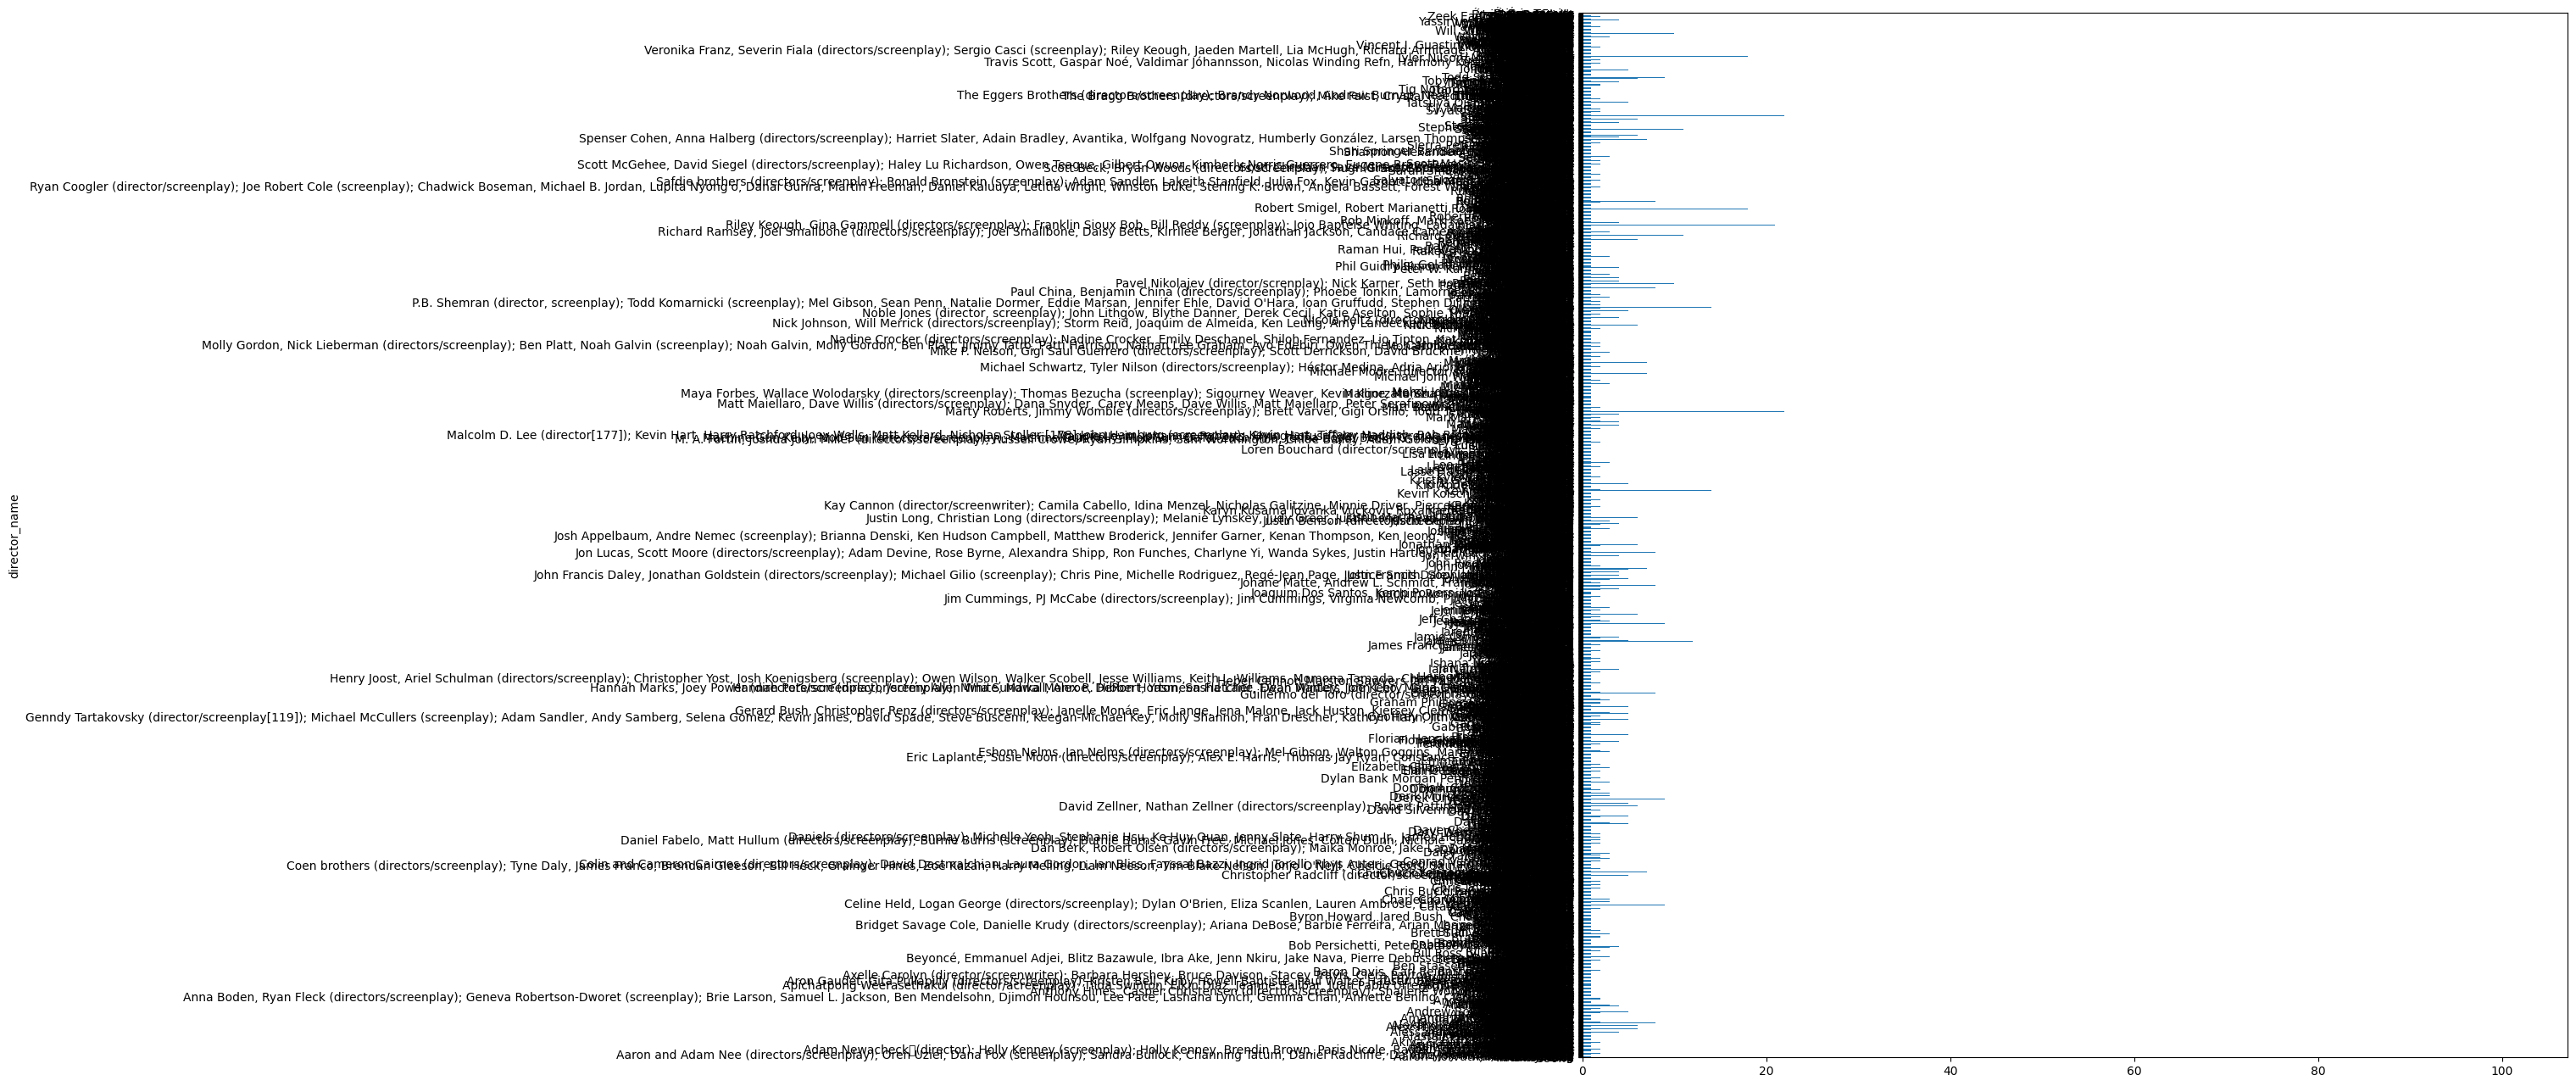

In [ ]:
final_df.director_name.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = pd.read_csv('/content/reviews.txt', sep = '\t', names =['Reviews','Comments'])

In [ ]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [ ]:
stopset = list(stopwords.words('english'))

In [ ]:
stopset

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
vectorizer = TfidfVectorizer(
    use_idf=True,
    lowercase=True,
    strip_accents='ascii',
    stop_words=stopset  # Pass the stopwords as a list
)

In [ ]:
# Fit and transform the data
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews

# Save the vectorizer to a file
pickle.dump(vectorizer, open('transform.pkl', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [ ]:
#we will be using this model for sentiment analysis
pickle.dump(clf, open('nlp_model.pkl', 'wb'))